In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
# DBSCAN
from sklearn.cluster import DBSCAN
# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors
# scaler
from sklearn.preprocessing import StandardScaler
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples
import folium

In [5]:
data = pd.read_table("./data/cleaned-data.csv", sep=",")

In [6]:
# Scale the data
columns_to_drop = ['id', 'user', 'tags', 'title',  'date_taken_minute', 'date_taken_hour', 'date_taken_day', 'date_taken_month', 'date_taken_year', 'date_upload_minute', 'date_upload_hour', 'date_upload_day', 'date_upload_month', 'date_upload_year', 'Unnamed: 16',	'Unnamed: 17',	'Unnamed: 18']
df_clustering = data.drop(columns_to_drop , axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.46842127 -0.56311456]
 [-0.52422679  0.71829489]
 [-0.26470298  0.20909286]
 ...
 [-0.15920663 -0.11875508]
 [-0.15920663 -0.11875508]
 [-0.35164433 -0.2444322 ]]


lat      long
0 -0.468421 -0.563115
1 -0.524227  0.718295
2 -0.264703  0.209093
3  0.555687  1.063759
4  0.555687  1.063759

In [ ]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

In [ ]:
fig = find_optimal_eps(scaled_data, 4)
fig.show() # display the plot

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
best_eps = 0.033 #0.13
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_data)

In [13]:
data['cluster dbscan'] = best_labels
data['silhouette dbscan'] = silhouette_samples(scaled_data, best_labels, metric='euclidean')
print(best_labels)
data

[0 0 0 ... 0 0 0]


id           user        lat      long  \
0        4395181099   30624617@N03  45.754858  4.821710   
1        4394748717   35853470@N00  45.753270  4.862953   
2        4394694699   11817998@N05  45.760655  4.846564   
3        4394803790   11545749@N06  45.784000  4.874072   
4        4394803554   11545749@N06  45.784000  4.874072   
...             ...            ...        ...       ...   
187538  44402328654   90493526@N00  45.758316  4.825197   
187539  44210748275  144146684@N04  45.762635  4.837299   
187540  45122361361   95450872@N03  45.763657  4.836012   
187541  45073351222   95450872@N03  45.763657  4.836012   
187542  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
0                      chair,lyon,rhône,chaise,rhônealpes   
1                                                     NaN   
2                                              365,iphone   
3            nin,nineinchnails,gift,screening,toiou,avott   
4       lyon,nin,nineinchnails,gift,screening,toiou,avott   
...                                                   ...   
187538  europe,france,lyon,croixrousse,streetart,wheat...   
187539                                                NaN   
187540  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187541  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187542  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
0                             Chaises avec vue               11.0   
1                                          NaN               51.0   
2                       59/365 - R46 V103 B163               29.0   
3                  2010-01-29 Toiou Avott Lyon               15.0   
4                  2010-01-28 Toiou Avott Lyon               10.0   
...                                        ...                ...   
187538  Pasted paper by Big Ben [Lyon, France]               18.0   
187539                             white blood               36.0   
187540         Lyon - Porte Passage de l'Argue               48.0   
187541               Lyon - Passage de l'Argue               48.0   
187542       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
0                    15              28                 2  ...   
1                    17              28                 2  ...   
2                    17              28                 2  ...   
3                    20              28                 1  ...   
4                    20              28                 1  ...   
...                 ...             ...               ...  ...   
187538               17              30                 9  ...   
187539               16               5                10  ...   
187540               19              27                 9  ...   
187541               19              27                 9  ...   
187542               14              28                 9  ...   

        date_upload_minute  date_upload_hour  date_upload_day  \
0                       23                20             28.0   
1                       52                17             28.0   
2                       33                17             28.0   
3                       38                12             28.0   
4                       38                12             28.0   
...                    ...               ...              ...   
187538                  11                23              5.0   
187539                  41                22              5.0   
187540                  40                22              5.0   
187541                  29                22              5.0   
187542                  21                22              5.0   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
0                       2            2010.0          NaN          NaN   
1                       2 

In [14]:
# ANSWER
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

In [15]:
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = data.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['cluster dbscan'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["cluster dbscan"]}',
        icon=folium.Icon(color=colors[row["cluster dbscan"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters

In [16]:
filtered_data_dsbcan = data[(data['cluster dbscan'] == 0)]
filtered_data_dsbcan

id           user        lat      long  \
0        4395181099   30624617@N03  45.754858  4.821710   
1        4394748717   35853470@N00  45.753270  4.862953   
2        4394694699   11817998@N05  45.760655  4.846564   
3        4394803790   11545749@N06  45.784000  4.874072   
4        4394803554   11545749@N06  45.784000  4.874072   
...             ...            ...        ...       ...   
187538  44402328654   90493526@N00  45.758316  4.825197   
187539  44210748275  144146684@N04  45.762635  4.837299   
187540  45122361361   95450872@N03  45.763657  4.836012   
187541  45073351222   95450872@N03  45.763657  4.836012   
187542  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
0                      chair,lyon,rhône,chaise,rhônealpes   
1                                                     NaN   
2                                              365,iphone   
3            nin,nineinchnails,gift,screening,toiou,avott   
4       lyon,nin,nineinchnails,gift,screening,toiou,avott   
...                                                   ...   
187538  europe,france,lyon,croixrousse,streetart,wheat...   
187539                                                NaN   
187540  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187541  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187542  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
0                             Chaises avec vue               11.0   
1                                          NaN               51.0   
2                       59/365 - R46 V103 B163               29.0   
3                  2010-01-29 Toiou Avott Lyon               15.0   
4                  2010-01-28 Toiou Avott Lyon               10.0   
...                                        ...                ...   
187538  Pasted paper by Big Ben [Lyon, France]               18.0   
187539                             white blood               36.0   
187540         Lyon - Porte Passage de l'Argue               48.0   
187541               Lyon - Passage de l'Argue               48.0   
187542       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
0                    15              28                 2  ...   
1                    17              28                 2  ...   
2                    17              28                 2  ...   
3                    20              28                 1  ...   
4                    20              28                 1  ...   
...                 ...             ...               ...  ...   
187538               17              30                 9  ...   
187539               16               5                10  ...   
187540               19              27                 9  ...   
187541               19              27                 9  ...   
187542               14              28                 9  ...   

        date_upload_minute  date_upload_hour  date_upload_day  \
0                       23                20             28.0   
1                       52                17             28.0   
2                       33                17             28.0   
3                       38                12             28.0   
4                       38                12             28.0   
...                    ...               ...              ...   
187538                  11                23              5.0   
187539                  41                22              5.0   
187540                  40                22              5.0   
187541                  29                22              5.0   
187542                  21                22              5.0   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
0                       2            2010.0          NaN          NaN   
1                       2 

In [17]:
df_clustering_filtered = filtered_data_dsbcan.drop(columns_to_drop , axis=1)
# Scale the data
scaler = StandardScaler()
scaled_data_filtered = scaler.fit_transform(df_clustering_filtered)
# show
print(scaled_data_filtered)

[[-0.67344216 -0.96139588  0.         -1.32651168]
 [-0.80935941  2.03878802  0.         -1.36884615]
 [-0.17727569  0.84658537  0.         -0.0893156 ]
 ...
 [ 0.07966613  0.07898989  0.          1.80727726]
 [ 0.07966613  0.07898989  0.          1.80727726]
 [-0.38902588 -0.2152599   0.          0.70832509]]


In [18]:
fig = find_optimal_eps(scaled_data_filtered, 4)
fig.show() # display the plot

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [19]:
best_eps = 0.038 #0.05
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan_filtered = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels_filtered = best_dbscan_filtered.fit_predict(scaled_data_filtered)

In [20]:
filtered_data_dsbcan['cluster dbscan'] = best_labels_filtered
filtered_data_dsbcan['silhouette dbscan'] = silhouette_samples(scaled_data_filtered, best_labels_filtered, metric='euclidean')
filtered_data_dsbcan

C:\temp\ipykernel_9880\1479139782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\temp\ipykernel_9880\1479139782.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id           user        lat      long  \
0        4395181099   30624617@N03  45.754858  4.821710   
1        4394748717   35853470@N00  45.753270  4.862953   
2        4394694699   11817998@N05  45.760655  4.846564   
3        4394803790   11545749@N06  45.784000  4.874072   
4        4394803554   11545749@N06  45.784000  4.874072   
...             ...            ...        ...       ...   
187538  44402328654   90493526@N00  45.758316  4.825197   
187539  44210748275  144146684@N04  45.762635  4.837299   
187540  45122361361   95450872@N03  45.763657  4.836012   
187541  45073351222   95450872@N03  45.763657  4.836012   
187542  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
0                      chair,lyon,rhône,chaise,rhônealpes   
1                                                     NaN   
2                                              365,iphone   
3            nin,nineinchnails,gift,screening,toiou,avott   
4       lyon,nin,nineinchnails,gift,screening,toiou,avott   
...                                                   ...   
187538  europe,france,lyon,croixrousse,streetart,wheat...   
187539                                                NaN   
187540  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187541  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187542  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
0                             Chaises avec vue               11.0   
1                                          NaN               51.0   
2                       59/365 - R46 V103 B163               29.0   
3                  2010-01-29 Toiou Avott Lyon               15.0   
4                  2010-01-28 Toiou Avott Lyon               10.0   
...                                        ...                ...   
187538  Pasted paper by Big Ben [Lyon, France]               18.0   
187539                             white blood               36.0   
187540         Lyon - Porte Passage de l'Argue               48.0   
187541               Lyon - Passage de l'Argue               48.0   
187542       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
0                    15              28                 2  ...   
1                    17              28                 2  ...   
2                    17              28                 2  ...   
3                    20              28                 1  ...   
4                    20              28                 1  ...   
...                 ...             ...               ...  ...   
187538               17              30                 9  ...   
187539               16               5                10  ...   
187540               19              27                 9  ...   
187541               19              27                 9  ...   
187542               14              28                 9  ...   

        date_upload_minute  date_upload_hour  date_upload_day  \
0                       23                20             28.0   
1                       52                17             28.0   
2                       33                17             28.0   
3                       38                12             28.0   
4                       38                12             28.0   
...                    ...               ...              ...   
187538                  11                23              5.0   
187539                  41                22              5.0   
187540                  40                22              5.0   
187541                  29                22              5.0   
187542                  21                22              5.0   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
0                       2            2010.0          NaN          NaN   
1                       2 

In [21]:
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = filtered_data_dsbcan.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['cluster dbscan'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["cluster dbscan"]}',
        icon=folium.Icon(color=colors[row["cluster dbscan"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters

In [22]:
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

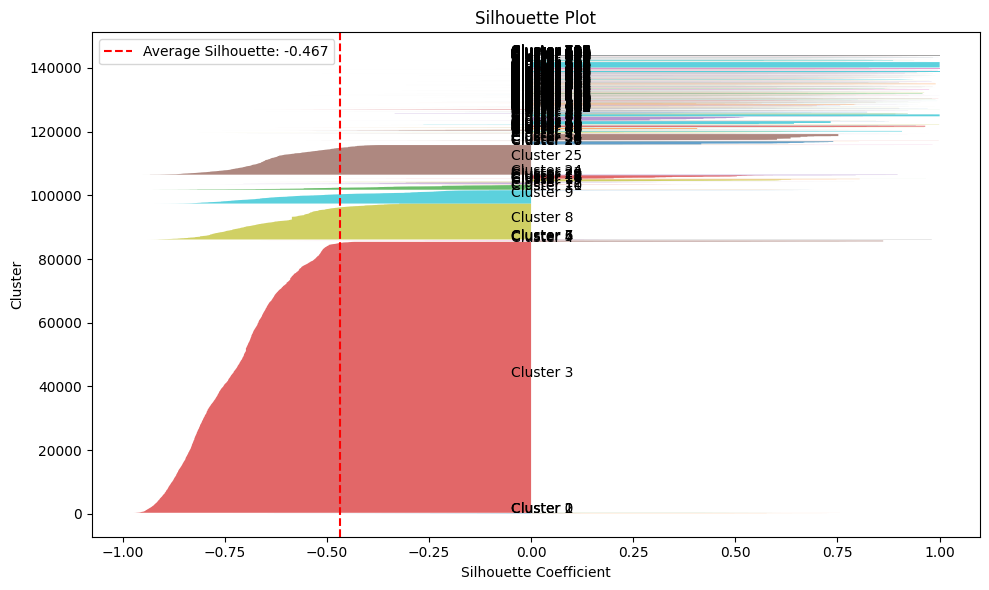

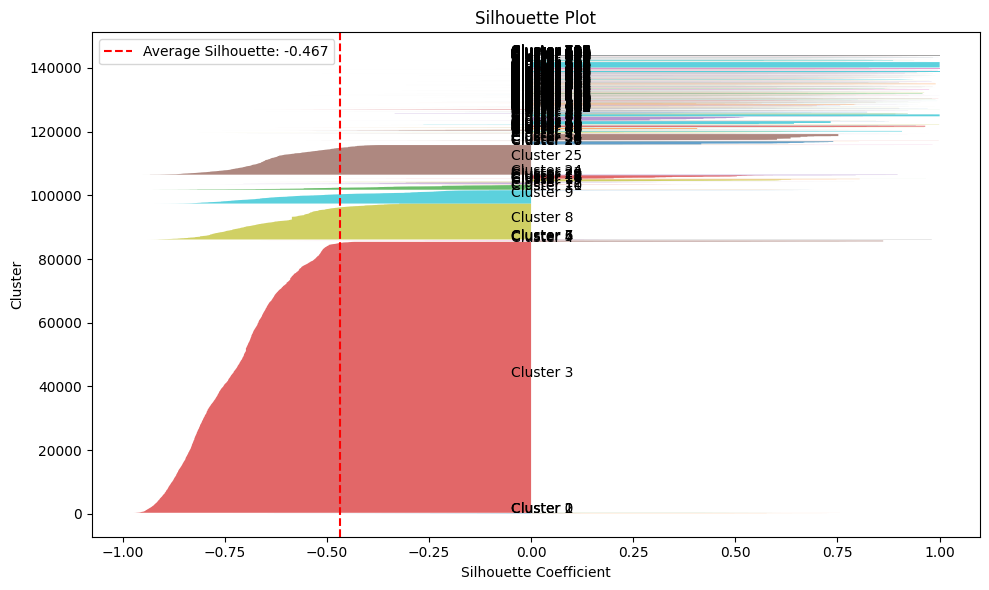

In [23]:
plot_silhouette(filtered_data_dsbcan['silhouette dbscan'].values, silhouette_score(scaled_data_filtered, best_labels_filtered, metric='euclidean'), best_labels_filtered, n_clusters=len(set(best_labels_filtered)) - (1 if -1 in best_labels_filtered else 0))

In [40]:
filtered_data_dsbcan_2 = filtered_data_dsbcan[(filtered_data_dsbcan['cluster dbscan'] == 3) | (filtered_data_dsbcan['cluster dbscan'] == 8) | (filtered_data_dsbcan['cluster dbscan'] == 9) | (filtered_data_dsbcan['cluster dbscan'] == 25)]
filtered_data_dsbcan_2

id           user        lat      long  \
5        4394566432   16197488@N06  45.755940  4.833158   
7        4394565970   16197488@N06  45.774662  4.834005   
8        4392370105   47924539@N05  45.762328  4.827547   
9        4392367159   47924539@N05  45.762059  4.822654   
10       4393122952   47924539@N05  45.767328  4.833362   
...             ...            ...        ...       ...   
187538  44402328654   90493526@N00  45.758316  4.825197   
187539  44210748275  144146684@N04  45.762635  4.837299   
187540  45122361361   95450872@N03  45.763657  4.836012   
187541  45073351222   95450872@N03  45.763657  4.836012   
187542  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
5                   poste,lyon,streetphotography,rue,gens   
7       lyon,streetphotography,rue,montblanc,gens,mont...   
8                           france,lyon,lesphotosdevoyage   
9                 france,lyon,fourvière,lesphotosdevoyage   
10                                      lesphotosdevoyage   
...                                                   ...   
187538  europe,france,lyon,croixrousse,streetart,wheat...   
187539                                                NaN   
187540  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187541  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
187542  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
5                                          NaN               57.0   
7                                          NaN               23.0   
8                           Courette Lyonnaise               29.0   
9                                    Fourvière               28.0   
10                          Lyon Novembre (64)               21.0   
...                                        ...                ...   
187538  Pasted paper by Big Ben [Lyon, France]               18.0   
187539                             white blood               36.0   
187540         Lyon - Porte Passage de l'Argue               48.0   
187541               Lyon - Passage de l'Argue               48.0   
187542       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
5                    12              27                 2  ...   
7                    10              27                 2  ...   
8                    12              27                 2  ...   
9                    12              27                 2  ...   
10                   12              27                 2  ...   
...                 ...             ...               ...  ...   
187538               17              30                 9  ...   
187539               16               5                10  ...   
187540               19              27                 9  ...   
187541               19              27                 9  ...   
187542               14              28                 9  ...   

        date_upload_minute  date_upload_hour  date_upload_day  \
5                        1                10             28.0   
7                        0                10             28.0   
8                       29                21             27.0   
9                       28                21             27.0   
10                      21                21             27.0   
...                    ...               ...              ...   
187538                  11                23              5.0   
187539                  41                22              5.0   
187540                  40                22              5.0   
187541                  29                22              5.0   
187542                  21                22              5.0   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
5                       2            2010.0          NaN          NaN   
7                       2 

In [41]:
df_clustering_filtered = filtered_data_dsbcan_2.drop(columns_to_drop , axis=1)
# Scale the data
scaler = StandardScaler()
scaled_data_filtered = scaler.fit_transform(df_clustering_filtered)
# show
print(scaled_data_filtered)

[[-0.64246776  0.02300334 -0.42176475 -0.88572191]
 [ 1.13859057  0.10439956 -0.42176475 -1.26175744]
 [-0.03476556 -0.51621059 -0.42176475  0.04826462]
 ...
 [ 0.09166466  0.29727112 -0.42176475 -0.8438403 ]
 [ 0.09166466  0.29727112 -0.42176475 -0.8438403 ]
 [-0.4292773  -0.09145109 -0.42176475  0.8946799 ]]


In [42]:
fig = find_optimal_eps(scaled_data_filtered, 4)
fig.show() # display the plot

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
best_eps = 1.157
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan_filtered = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels_filtered = best_dbscan_filtered.fit_predict(scaled_data_filtered)

In [31]:
filtered_data_dsbcan_2['cluster dbscan'] = best_labels_filtered
filtered_data_dsbcan_2['silhouette dbscan'] = silhouette_samples(scaled_data_filtered, best_labels_filtered, metric='euclidean')
filtered_data_dsbcan_2

C:\temp\ipykernel_9880\1182154614.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\temp\ipykernel_9880\1182154614.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id          user        lat      long  \
131      4385082504  22583865@N02  45.768675  4.786412   
148      4379528011  22583865@N02  45.768675  4.786412   
204      4371624334  29161621@N03  45.782107  4.838973   
205      4370802177  29161621@N03  45.781434  4.839166   
210      4370258533  26048905@N06  45.841370  4.798471   
...             ...           ...        ...       ...   
176711  46201593455  35971282@N00  45.841380  4.797695   
177276  48073904383  37261055@N00  45.842175  4.798044   
177277  48073856061  37261055@N00  45.842186  4.798025   
182356  48697943886  41746313@N04  45.840869  4.798868   
185328  45167053805  23607756@N03  45.758421  4.910438   

                                                     tags  \
131     street,lyon,graf,horloge,rue,2010,d700,tassinl...   
148     2010,50mmf14g,d700,thedigitalfly,lotfidakhli,a...   
204        night,d50,sigma,1020mm,effect,nuit,pauselongue   
205              night,d50,1020mm,effect,nuit,pauselongue   
210                               summer,cricket,montsdor   
...                                                   ...   
176711  2019,france,rhone,montblanc,mont,blanc,thou,mo...   
177276                                                NaN   
177277                                                NaN   
182356                                    lyon,confluence   
185328                                        noiretblanc   

                                              title  date_taken_minute  \
131          Antisocial ! Tu perds ton sang froid !               58.0   
148              Mais émilie avait laissé un indice               59.0   
204     Montée de la boucle de nuit en pause longue               56.0   
205                                        DSC_3711               46.0   
210                                        DSC_2539               12.0   
...                                             ...                ...   
176711                                   Mont-Blanc                0.0   
177276                                     IMG_1674               37.0   
177277                                     IMG_1676               37.0   
182356                   Fourvière et la confluence               35.0   
185328                                    Blackness               59.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
131                  18              22                 2  ...   
148                  18              22                 2  ...   
204                  23              19                 2  ...   
205                  23              19                 2  ...   
210                  20              18                 8  ...   
...                 ...             ...               ...  ...   
176711                0               1                 1  ...   
177276                9               6                 5  ...   
177277                9               6                 5  ...   
182356               19               7                 9  ...   
185328               12              27                11  ...   

        date_upload_minute  date_upload_hour  date_upload_day  \
131                      1                16             24.0   
148                     11                22             22.0   
204                     10                 0             20.0   
205                     30                23             19.0   
210                      2                19             19.0   
...                    ...               ...              ...   
176711                  30                20             16.0   
177276                  19                19             16.0   
177277                  19                19             16.0   
182356                  19                11              8.0   
185328                  29                21             27.0   

        date_upload_month  date_upload_year  Unnamed: 16  Unnamed: 17  \
131                     2            2010.0        

In [34]:
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = filtered_data_dsbcan_2

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['cluster dbscan'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["cluster dbscan"]}',
        icon=folium.Icon(color=colors[row["cluster dbscan"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters

In [ ]:
data.to_csv("data/clustered-data.csv", index=False)